In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
merged_df = pd.read_csv('merged_df.csv', encoding='iso-8859-1')

merged_df.sample(3)

,area_abbreviation,area_code,area,item_code,item,element_code,element,unit,latitude,longitude,...,population_unit,value,flag,flag_description,note,years_existing,average_production,value_per_capita,iso_alpha3,continent
11547,LTU,126,Lithuania,2611,"Oranges, Mandarines",5142,Food,1000 tonnes,55.17,23.88,...,1000,2890.297,X,International reliable sources,"UNDESA, Population Division â World Populati...",22,34.681818,2.890297,LTU,Europe
19400,TUR,223,Turkey,2960,"Fish, Seafood",5142,Food,1000 tonnes,38.96,35.24,...,1000,80745.020,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,340.188679,80.745020,TUR,Asia
11984,MWI,130,Malawi,2912,Treenuts,5142,Food,1000 tonnes,-13.25,34.30,...,1000,18622.104,X,International reliable sources,"UNDESA, Population Division â World Populati...",53,0.962264,18.622104,MWI,Africa


In [47]:
#copied from compasison_plot

top_5_areas = merged_df.groupby('area')['average_production'].mean().nlargest(5)
filtered_food = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Food')
filtered_feed = (merged_df['area'].isin(top_5_areas.index)) & (merged_df['element'] == 'Feed')
merged_df[filtered_food].groupby(['area', 'item'])['average_production'].mean().reset_index()
top_5_food = merged_df[filtered_food].groupby(['area', 'item', 'element'])['average_production'].mean()
top_5_food = top_5_food.groupby('area').nlargest(5).reset_index(level=0, drop=True).reset_index()

# top_5_food

In [48]:
##PREPARATION FOR LINE PLOT

# function to Loop through the columns in the filtered_df that start with 'y'
def extract_year_values(df):
    area_code = df['area_code'].values[0]
    item_code = df['item_code'].values[0]
    year_values = []
    for col in df.columns:
        if col.startswith('y') and col not in ['year_code', 'year', 'years_existing']:
            year = int(col[1:])  # extract the year from the column name
            value = df[col].values[0]  # get the value for this year
            year_values.append({
                'Area': area_code,
                'Item': item_code,
                'Year': year,
                'Year Value': value
            })
    return pd.DataFrame(year_values)



def plot_top_food_items(df, area, items, element):
    plt.figure(figsize=(10, 6))
    
    # Loop through each item and filter, extract, and plot the data
    for item in items:
        # Filter the DataFrame for the specified area, item, and element
        filtered_df = df[(df['area'] == area) & (df['item'] == item) & (df['element'] == element)]
        
        # Extract year values
        year_df = extract_year_values(filtered_df)
        
        # Plot the data
        sns.lineplot(x='Year', y='Year Value', data=year_df, label=item)
    
    # Customize the plot
    plt.title(f'Line Plot for Top 5 Food Items in {area}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend(title=f'{element} Items')
    plt.show()


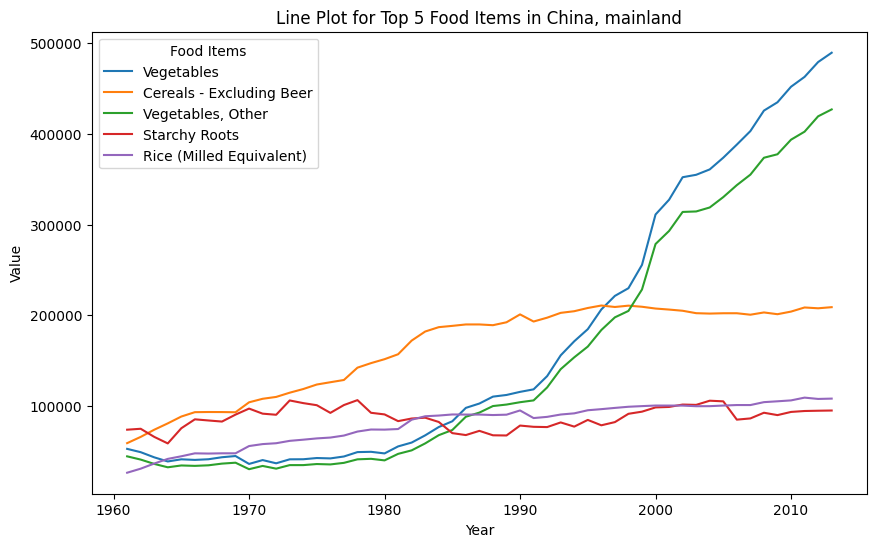

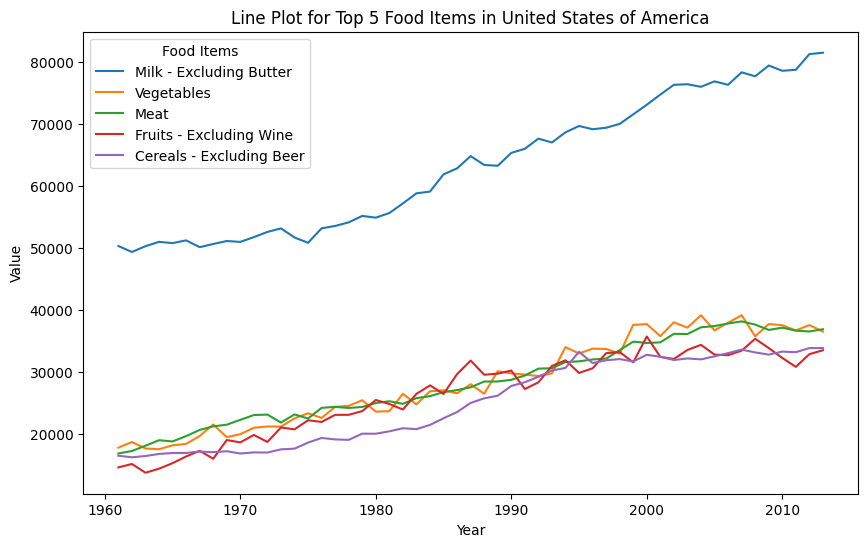

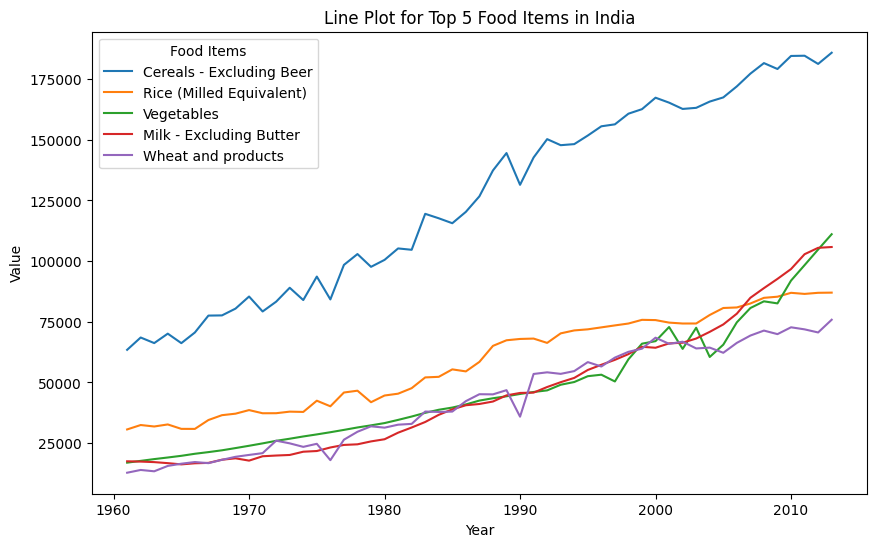

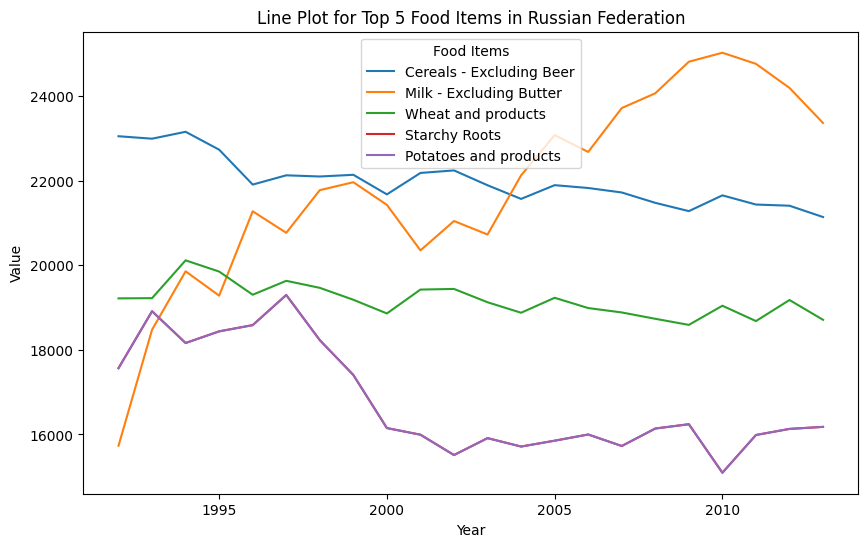

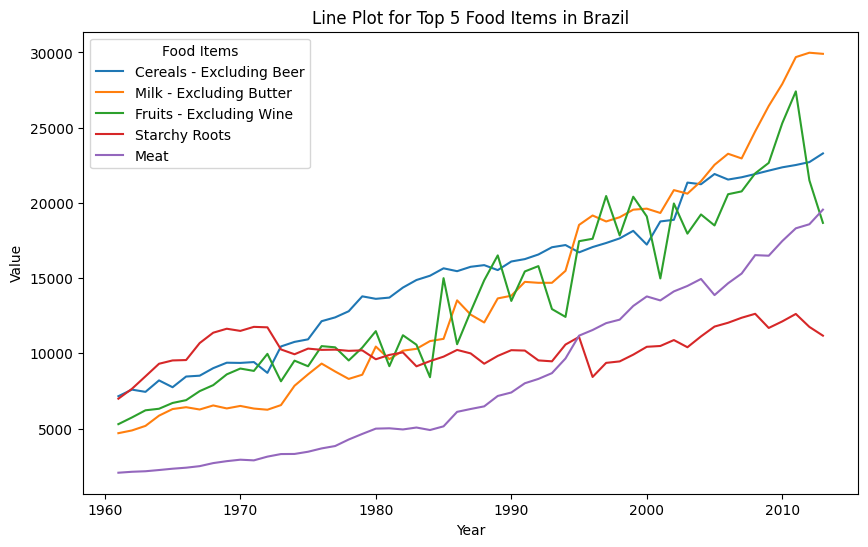

In [49]:
areas = top_5_areas.index.tolist()

for area in areas:
    # Filter the top 5 food items for the specific area and element 'Food'
    food_items = top_5_food[(top_5_food['area'] == area) & (top_5_food['element'] == 'Food')]['item'].values
    
    # Call the function to create the plot
    plot_top_food_items(merged_df, area, food_items, 'Food')